## Evaluation of recommender system algorithms in tourism

### Prediction Algorithms
---

In [1]:
# For better precision on tests
import random
import numpy as np

# For plots some results
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10') #seaborn-talk, fivethirtyeight
%matplotlib inline

from surprise import Reader, Dataset
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline
from surprise import SVD, SVDpp, NMF
from surprise import NormalPredictor, BaselineOnly
from surprise import CoClustering, SlopeOne
from surprise.model_selection import cross_validate, GridSearchCV

In [2]:
random.seed(0)
np.random.seed(0)

reader = Reader(line_format='user item rating', sep=',', rating_scale=(0,5))
data = Dataset.load_from_file('tourism.csv', reader=reader)

#### Some Functions

In [3]:
def crossvalidate(algorithm):
    return cross_validate(algorithm, data, measures=['RMSE', 'MAE', 'FCP'], cv=5)

In [4]:
def calculateRMSEFinalMean(algorithm):
    score = 0
    for mean in algorithm['test_rmse']:
        score = score + mean
    
    score = score / len(algorithm['test_rmse'])
    return score

In [5]:
def calculateMAEFinalMean(algorithm):
    score = 0
    for mean in algorithm['test_mae']:
        score = score + mean
    
    score = score / len(algorithm['test_mae'])
    return score

In [6]:
def calculateFCPFinalMean(algorithm):
    score = 0
    for mean in algorithm['test_fcp']:
        score = score + mean
    
    score = score / len(algorithm['test_fcp'])
    return score

### Calculate Cross-Validated
---

#### Calculate all kNN cross-validated means

In [7]:
sim_options_cosine = {'name': 'cosine','user_based': True}
sim_options_msd = {'name': 'msd','user_based': True}
sim_options_pearson = {'name': 'pearson','user_based': True}
sim_options_baseline = {'name': 'pearson_baseline','user_based': True, 'shrinkage': 0}

*kNN Basic Variations*

In [8]:
kNNBasicCos = crossvalidate(KNNBasic(sim_options=sim_options_cosine))
kNNBasicMSD = crossvalidate(KNNBasic(sim_options=sim_options_msd))
kNNBasicPearson = crossvalidate(KNNBasic(sim_options=sim_options_pearson))
kNNBasicPearsonB = crossvalidate(KNNBasic(sim_options=sim_options_baseline))

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson si

*kNN With Means Variations*

In [9]:
kNNMeansCos = crossvalidate(KNNWithMeans(sim_options=sim_options_cosine))
kNNMeansMSD = crossvalidate(KNNWithMeans(sim_options=sim_options_msd))
kNNMeansPearson = crossvalidate(KNNWithMeans(sim_options=sim_options_pearson))
kNNMeansPearsonB = crossvalidate(KNNWithMeans(sim_options=sim_options_baseline))

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson si

*kNN With ZScore Variations*

In [10]:
kNNZCos = crossvalidate(KNNWithZScore(sim_options=sim_options_cosine))
kNNZMSD = crossvalidate(KNNWithZScore(sim_options=sim_options_msd))
kNNZPearson = crossvalidate(KNNWithZScore(sim_options=sim_options_pearson))
kNNZPearsonB = crossvalidate(KNNWithZScore(sim_options=sim_options_baseline))

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson si

*kNN Baseline Variations*

In [11]:
kNNBaseCos = crossvalidate(KNNBaseline(sim_options=sim_options_cosine))
kNNBaseMSD = crossvalidate(KNNBaseline(sim_options=sim_options_msd))
kNNBasePearson = crossvalidate(KNNBaseline(sim_options=sim_options_pearson))
kNNBasePearsonB = crossvalidate(KNNBaseline(sim_options=sim_options_baseline))

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd 

#### Calculate all Matrix Factorization-based algorithms cross-validated means

In [12]:
svd = crossvalidate(SVD())
svdpp = crossvalidate(SVDpp())

#### Calculate all Basic Algorithms cross-validated means

In [13]:
baselineOnly = crossvalidate(BaselineOnly())

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


#### Calculate other Algorithms cross-validated means

In [14]:
coClustering = crossvalidate(CoClustering())
slopeOne = crossvalidate(SlopeOne())

#### Calculate Final RMSE (Root Mean Squared Error) Mean of all algorithms

In [16]:
scoreRMSE_kNNBasicCos = calculateRMSEFinalMean(kNNBasicCos)
scoreRMSE_kNNBasicMSD = calculateRMSEFinalMean(kNNBasicMSD)
scoreRMSE_kNNBasicPearson = calculateRMSEFinalMean(kNNBasicPearson)
scoreRMSE_kNNBasicPearsonB = calculateRMSEFinalMean(kNNBasicPearsonB)

scoreRMSE_kNNMeansCos = calculateRMSEFinalMean(kNNMeansCos)
scoreRMSE_kNNMeansMSD = calculateRMSEFinalMean(kNNMeansMSD)
scoreRMSE_kNNMeansPearson = calculateRMSEFinalMean(kNNMeansPearson)
scoreRMSE_kNNMeansPearsonB = calculateRMSEFinalMean(kNNMeansPearsonB)

scoreRMSE_kNNZCos = calculateRMSEFinalMean(kNNZCos)
scoreRMSE_kNNZMSD = calculateRMSEFinalMean(kNNZMSD)
scoreRMSE_kNNZPearson = calculateRMSEFinalMean(kNNZPearson)
scoreRMSE_kNNZPearsonB = calculateRMSEFinalMean(kNNZPearsonB)

scoreRMSE_kNNBaseCos = calculateRMSEFinalMean(kNNBaseCos)
scoreRMSE_kNNBaseMSD = calculateRMSEFinalMean(kNNBaseMSD)
scoreRMSE_kNNBasePearson = calculateRMSEFinalMean(kNNBasePearson)
scoreRMSE_kNNBasePearsonB = calculateRMSEFinalMean(kNNBasePearsonB)

scoreRMSE_svd = calculateRMSEFinalMean(svd)
scoreRMSE_svdpp = calculateRMSEFinalMean(svdpp)

scoreRMSE_baselineOnly = calculateRMSEFinalMean(baselineOnly)

scoreRMSE_coClustering = calculateRMSEFinalMean(coClustering)
scoreRMSE_slopeOne = calculateRMSEFinalMean(slopeOne)

#### Calculate Final MAE (Mean Absolute Error) Means off all Algorithms

In [18]:
scoreMAE_kNNBasicCos = calculateMAEFinalMean(kNNBasicCos)
scoreMAE_kNNBasicMSD = calculateMAEFinalMean(kNNBasicMSD)
scoreMAE_kNNBasicPearson = calculateMAEFinalMean(kNNBasicPearson)
scoreMAE_kNNBasicPearsonB = calculateMAEFinalMean(kNNBasicPearsonB)

scoreMAE_kNNMeansCos = calculateMAEFinalMean(kNNMeansCos)
scoreMAE_kNNMeansMSD = calculateMAEFinalMean(kNNMeansMSD)
scoreMAE_kNNMeansPearson = calculateMAEFinalMean(kNNMeansPearson)
scoreMAE_kNNMeansPearsonB = calculateMAEFinalMean(kNNMeansPearsonB)

scoreMAE_kNNZCos = calculateMAEFinalMean(kNNZCos)
scoreMAE_kNNZMSD = calculateMAEFinalMean(kNNZMSD)
scoreMAE_kNNZPearson = calculateMAEFinalMean(kNNZPearson)
scoreMAE_kNNZPearsonB = calculateMAEFinalMean(kNNZPearsonB)

scoreMAE_kNNBaseCos = calculateMAEFinalMean(kNNBaseCos)
scoreMAE_kNNBaseMSD = calculateMAEFinalMean(kNNBaseMSD)
scoreMAE_kNNBasePearson = calculateMAEFinalMean(kNNBasePearson)
scoreMAE_kNNBasePearsonB = calculateMAEFinalMean(kNNBasePearsonB)

scoreMAE_svd = calculateMAEFinalMean(svd)
scoreMAE_svdpp = calculateMAEFinalMean(svdpp)

scoreMAE_baselineOnly = calculateMAEFinalMean(baselineOnly)

scoreMAE_coClustering = calculateMAEFinalMean(coClustering)
scoreMAE_slopeOne = calculateMAEFinalMean(slopeOne)

#### Calculate Final FCP (Fraction of Concordant Pairs) off all Algorithms

In [19]:
scoreFCP_kNNBasicCos = calculateFCPFinalMean(kNNBasicCos)
scoreFCP_kNNBasicMSD = calculateFCPFinalMean(kNNBasicMSD)
scoreFCP_kNNBasicPearson = calculateFCPFinalMean(kNNBasicPearson)
scoreFCP_kNNBasicPearsonB = calculateFCPFinalMean(kNNBasicPearsonB)

scoreFCP_kNNMeansCos = calculateFCPFinalMean(kNNMeansCos)
scoreFCP_kNNMeansMSD = calculateFCPFinalMean(kNNMeansMSD)
scoreFCP_kNNMeansPearson = calculateFCPFinalMean(kNNMeansPearson)
scoreFCP_kNNMeansPearsonB = calculateFCPFinalMean(kNNMeansPearsonB)

scoreFCP_kNNZCos = calculateFCPFinalMean(kNNZCos)
scoreFCP_kNNZMSD = calculateFCPFinalMean(kNNZMSD)
scoreFCP_kNNZPearson = calculateFCPFinalMean(kNNZPearson)
scoreFCP_kNNZPearsonB = calculateFCPFinalMean(kNNZPearsonB)

scoreFCP_kNNBaseCos = calculateFCPFinalMean(kNNBaseCos)
scoreFCP_kNNBaseMSD = calculateFCPFinalMean(kNNBaseMSD)
scoreFCP_kNNBasePearson = calculateFCPFinalMean(kNNBasePearson)
scoreFCP_kNNBasePearsonB = calculateFCPFinalMean(kNNBasePearsonB)

scoreFCP_svd = calculateFCPFinalMean(svd)
scoreFCP_svdpp = calculateFCPFinalMean(svdpp)

scoreFCP_baselineOnly = calculateFCPFinalMean(baselineOnly)

scoreFCP_coClustering = calculateFCPFinalMean(coClustering)
scoreFCP_slopeOne = calculateFCPFinalMean(slopeOne)

### Plot the results
---

In [20]:
names = [
        'kNN Basic - Cosine', 'kNN Basic - MSD', 
        'kNN Basic - Pearson', 
        'kNN Basic - Pearson B', 
        'kNN Means - Cosine', 
        'kNN Means - MSD',
        'kNN Means - Pearson',
        'kNN Means - Pearson B',
        'kNN Z - Cosine', 
        'kNN Z - MSD', 'kNN Z - Pearson',
        'kNN Z - Pearson B',
        'kNN Baseline - Cosine', 
        'kNN Baseline - MSD', 
        'kNN Baseline - Pearson', 
        'kNN Baseline - Pearson B',
        'SVD', 
        'SVDpp', 
        'Baseline Only',
        'CoClustering', 
        'SlopeOne'
        ]

namesForGraph = np.arange(len(names))

## Whitout NMF and similiar

scoresRMSE = [
            scoreRMSE_kNNBasicCos, 
            scoreRMSE_kNNBasicMSD, 
            scoreRMSE_kNNBasicPearson, 
            scoreRMSE_kNNBasicPearsonB,
            scoreRMSE_kNNMeansCos, 
            scoreRMSE_kNNMeansMSD, 
            scoreRMSE_kNNMeansPearson, 
            scoreRMSE_kNNMeansPearsonB,
            scoreRMSE_kNNZCos, 
            scoreRMSE_kNNZMSD, 
            scoreRMSE_kNNZPearson, 
            scoreRMSE_kNNZPearsonB,
            scoreRMSE_kNNBaseCos, 
            scoreRMSE_kNNBaseMSD, 
            scoreRMSE_kNNBasePearson, 
            scoreRMSE_kNNBasePearsonB,
            scoreRMSE_svd, 
            scoreRMSE_svdpp,
            scoreRMSE_baselineOnly,
            scoreRMSE_coClustering, 
            scoreRMSE_slopeOne
            ]

scoresMAE = [
            scoreMAE_kNNBasicCos, 
            scoreMAE_kNNBasicMSD, 
            scoreMAE_kNNBasicPearson, 
            scoreMAE_kNNBasicPearsonB,
            scoreMAE_kNNMeansCos, 
            scoreMAE_kNNMeansMSD, 
            scoreMAE_kNNMeansPearson, 
            scoreMAE_kNNMeansPearsonB,
            scoreMAE_kNNZCos, 
            scoreMAE_kNNZMSD, 
            scoreMAE_kNNZPearson, 
            scoreMAE_kNNZPearsonB,
            scoreMAE_kNNBaseCos, 
            scoreMAE_kNNBaseMSD, 
            scoreMAE_kNNBasePearson, 
            scoreMAE_kNNBasePearsonB,
            scoreMAE_svd, 
            scoreMAE_svdpp,
            scoreMAE_baselineOnly,
            scoreMAE_coClustering, 
            scoreMAE_slopeOne
            ]

scoresFCP = [
            scoreFCP_kNNBasicCos, 
            scoreFCP_kNNBasicMSD, 
            scoreFCP_kNNBasicPearson, 
            scoreFCP_kNNBasicPearsonB,
            scoreFCP_kNNMeansCos, 
            scoreFCP_kNNMeansMSD, 
            scoreFCP_kNNMeansPearson, 
            scoreFCP_kNNMeansPearsonB,
            scoreFCP_kNNZCos, 
            scoreFCP_kNNZMSD, 
            scoreFCP_kNNZPearson, 
            scoreFCP_kNNZPearsonB,
            scoreFCP_kNNBaseCos, 
            scoreFCP_kNNBaseMSD, 
            scoreFCP_kNNBasePearson, 
            scoreFCP_kNNBasePearsonB,
            scoreFCP_svd, 
            scoreFCP_svdpp, 
            scoreFCP_baselineOnly,
            scoreFCP_coClustering, 
            scoreFCP_slopeOne
            ]

Text(0.5,1,'Comparison of prediction algorithms with RMSE')

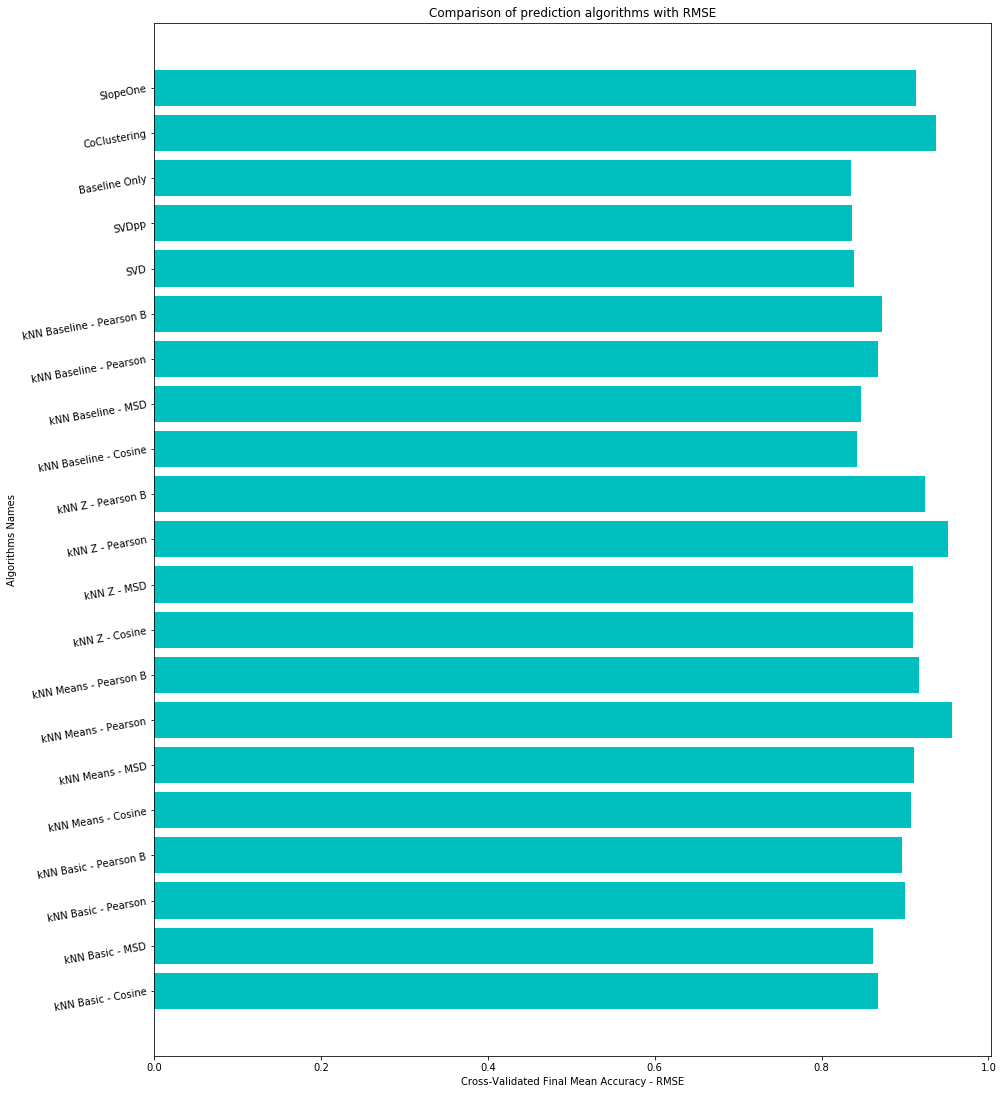

In [25]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 19
plt.rcParams["figure.figsize"] = fig_size

plt.barh(namesForGraph, scoresRMSE, color='c')
plt.ylabel('Algorithms Names')
plt.xlabel('Cross-Validated Final Mean Accuracy - RMSE')
plt.yticks(namesForGraph, names, rotation=10)
plt.title('Comparison of prediction algorithms with RMSE')

Text(0.5,1,'Comparison of prediction algorithms with MAE')

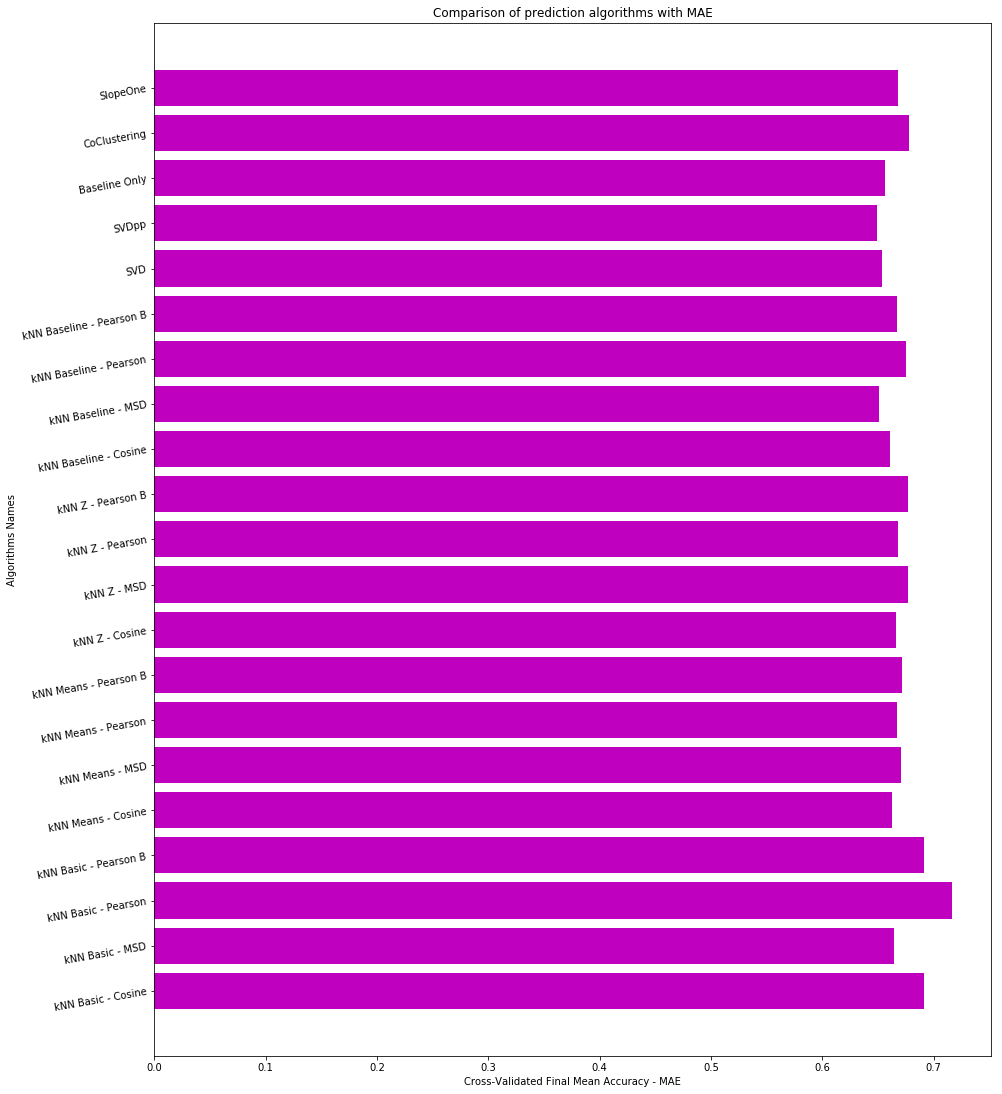

In [26]:
plt.barh(namesForGraph, scoresMAE, color='m')
plt.ylabel('Algorithms Names')
plt.xlabel('Cross-Validated Final Mean Accuracy - MAE')
plt.yticks(namesForGraph, names, rotation=10)
plt.title('Comparison of prediction algorithms with MAE')

Text(0.5,1,'Comparison of prediction algorithms with FCP')

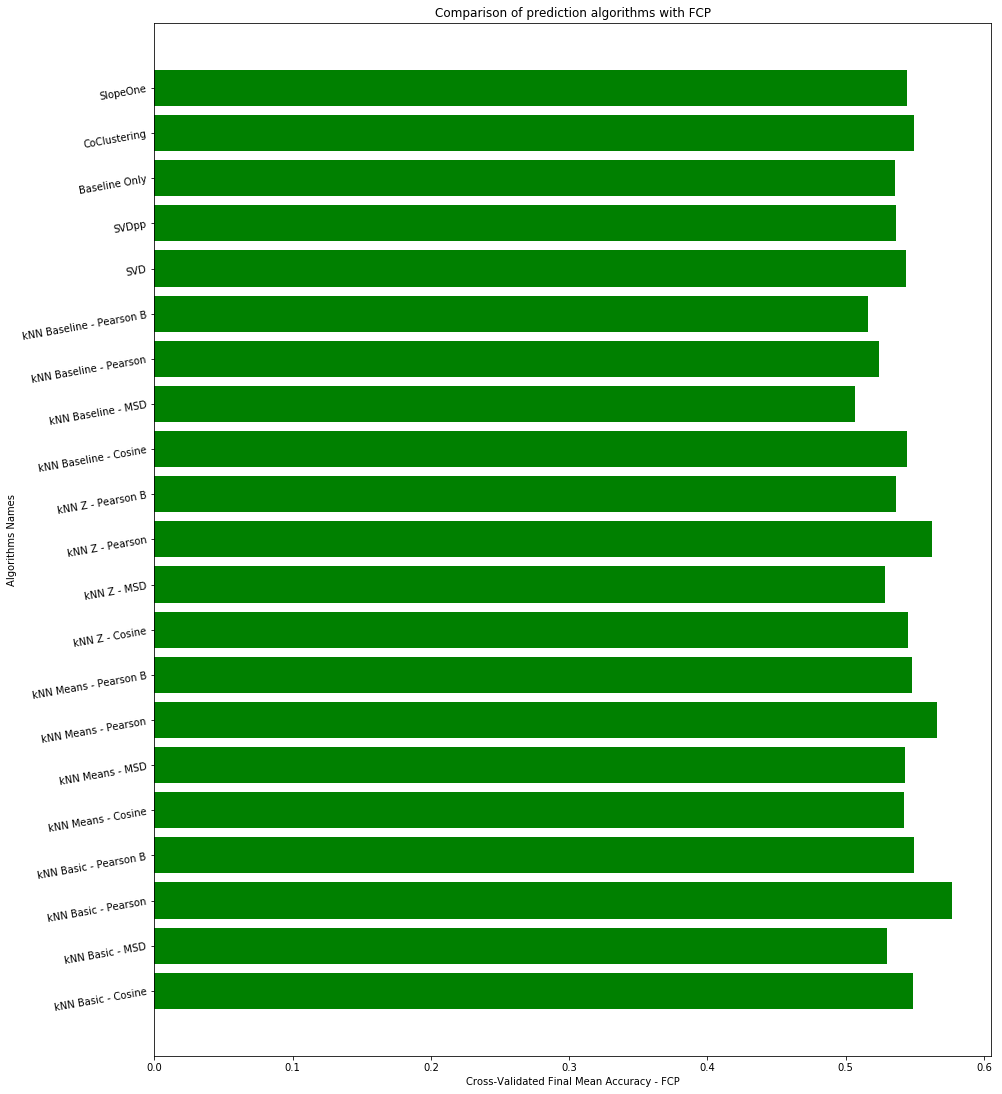

In [27]:

plt.barh(namesForGraph, scoresFCP, color='g')
plt.ylabel('Algorithms Names')
plt.xlabel('Cross-Validated Final Mean Accuracy - FCP')
plt.yticks(namesForGraph, names, rotation=10)
plt.title('Comparison of prediction algorithms with FCP')


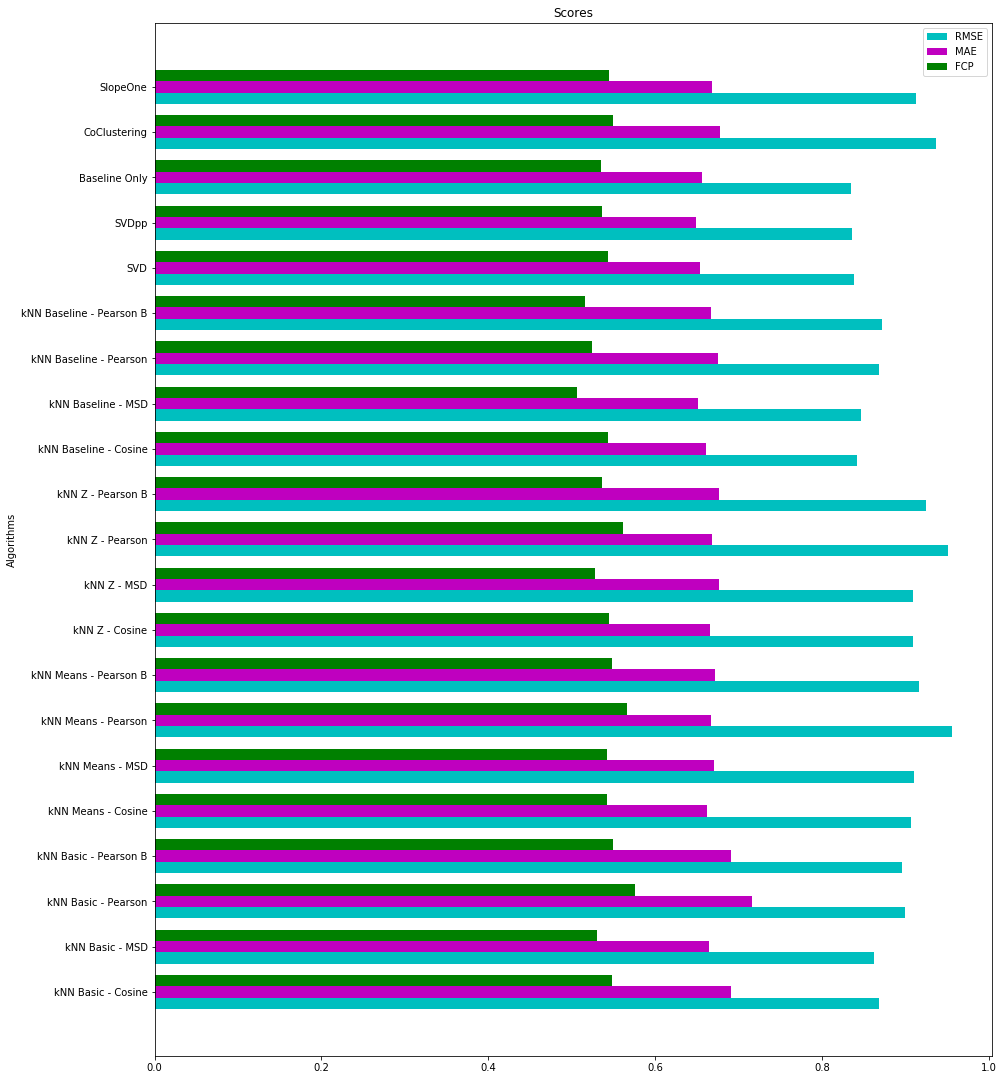

In [28]:
N = len(names)

rmse_means = scoresRMSE

ind = np.arange(N)
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.barh(ind, rmse_means, width, color='c')

mae_means = scoresMAE
rects2 = ax.barh(ind + width, mae_means, width, color='m')

fcp_means = scoresFCP
rects3 = ax.barh(ind + width * 2, fcp_means, width, color='g')

ax.set_ylabel('Algorithms')
ax.set_title('Scores')
ax.set_yticks(ind + width)
ax.set_yticklabels(names)

ax.legend((rects1[0], rects2[0], rects3[0]), ('RMSE', 'MAE', 'FCP'))
